### 190648C
### VIKASITHA K.S.S.
#### ASSIGNMENT 03


# EN2550: Assignment 03 on Object Counting on a Conveyor Belt

## Connected Component Analysis

In this part, we will generate an indexed image representing connected
components in `conveyor_f101.png` image. Notice that, as there are three
square nuts and one hexagonal nut in the image, there will be five
connected components (backgound will be assigned the label 0).

1.  Open the `hexnut_template.png`, `squarenut_template.png` and
    `conveyor_f100.png` and display. This is done for you.

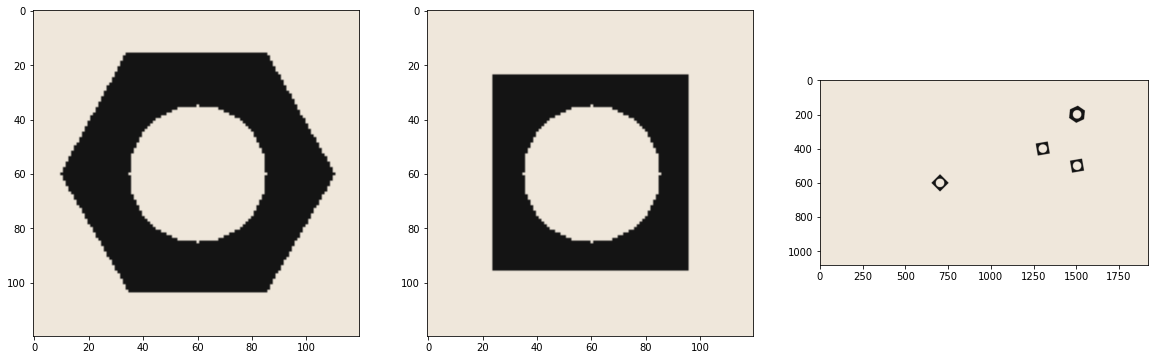

In [237]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread(r'Assignment-03 Materials\hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread(r'Assignment-03 Materials\squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread(r'Assignment-03 Materials\conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3,figsize=(20,6))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

2.  Convert the images to grayscale and apply Otsu's thresholding to
    obtain the binarized image. Do this for both the templates and belt
    images. See
    <https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html>
    for a guide. State the threshold value (automatically) selected in
    the operation. Display the output images.

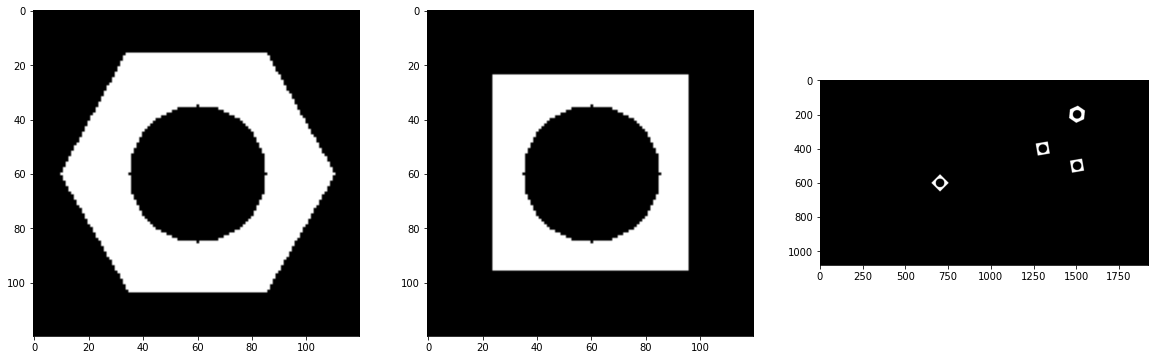

Treshold value = 20.0


In [238]:
hexnut_template = cv.cvtColor(hexnut_template,cv.COLOR_BGR2GRAY)
squarenut_template = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
conveyor_f100 = cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)

ret1,hexnut_template = cv.threshold(hexnut_template,0,255,cv.THRESH_OTSU)
ret2,squarenut_template = cv.threshold(squarenut_template,0,255,cv.THRESH_OTSU)
ret3,conveyor_f100 = cv.threshold(conveyor_f100,0,255,cv.THRESH_OTSU)

hexnut_template = np.invert(hexnut_template)
squarenut_template = np.invert(squarenut_template)
conveyor_f100 = np.invert(conveyor_f100)

fig, ax = plt. subplots(1,3,figsize=(20,6))
ax[0].imshow(hexnut_template, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(squarenut_template, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(conveyor_f100, cmap='gray', vmin=0, vmax=255)
plt.show()

print("Treshold value =", ret1)

3.  Carry out morphological closing to remove small holes inside the
    foreground. Use a $3 \times 3$ kernel. See
    <https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html>
    for a guide.

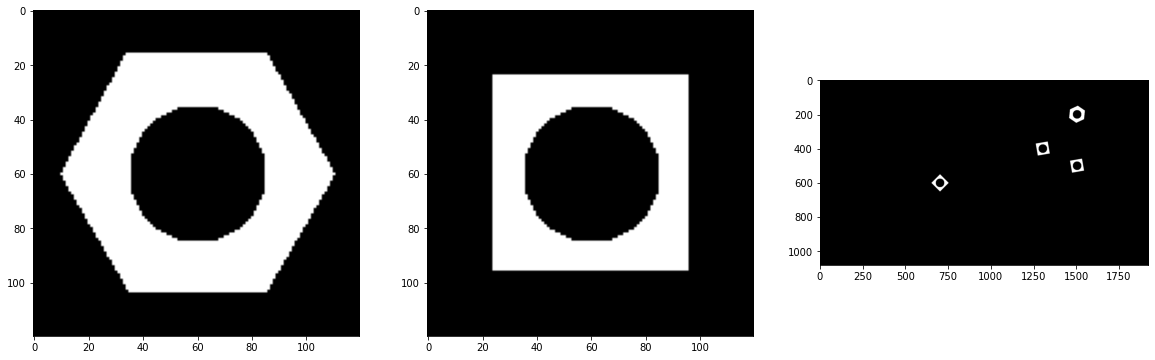

In [239]:
kernel = np.ones((3,3), np.uint8)
hexnut_template = cv.morphologyEx(hexnut_template, cv.MORPH_CLOSE, kernel)
squarenut_template = cv.morphologyEx(squarenut_template, cv.MORPH_CLOSE, kernel)
conveyor_f100 = cv.morphologyEx(conveyor_f100, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(1,3,figsize=(20,6))
ax[0].imshow(hexnut_template, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(squarenut_template, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(conveyor_f100, cmap='gray', vmin=0, vmax=255)
plt.show()

4.  Connected components analysis: apply the
    `connectedComponentsWithStats` function (see
    <https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f>)
    and display the outputs as colormapped images. Answer the following
    questions

-   How many connected components are detected in each image?
-   What are the statistics? Interpret these statistics.
-   What are the centroids?

For the hexnut template, you should get the object area in pixel as
approximately `4728`.

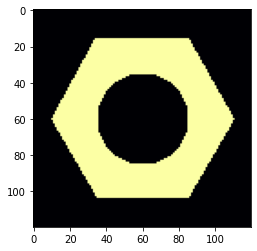

No of connected components - 1 (without the background)

---Component 1
* The starting x coordinate of the component - 10     * The starting y coordinate of the component - 16
* The width of the component - 101     * The height of the component - 88
* The area of the component - 4728
* The centroid (x, y) coordinates of the component - [59.83375635 59.22356176]


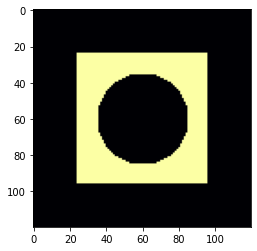

No of connected components - 1 (without the background)

---Component 1
* The starting x coordinate of the component - 24     * The starting y coordinate of the component - 24
* The width of the component - 72     * The height of the component - 72
* The area of the component - 3227
* The centroid (x, y) coordinates of the component - [59.19677719 59.19677719]


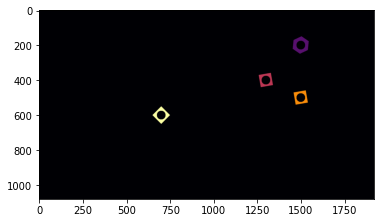

No of connected components - 4 (without the background)

---Component 1
* The starting x coordinate of the component - 1454     * The starting y coordinate of the component - 150
* The width of the component - 92     * The height of the component - 100
* The area of the component - 4636
* The centroid (x, y) coordinates of the component - [1499.24201898  199.28515962]

---Component 2
* The starting x coordinate of the component - 1259     * The starting y coordinate of the component - 359
* The width of the component - 82     * The height of the component - 82
* The area of the component - 3087
* The centroid (x, y) coordinates of the component - [1299.18302559  399.18302559]

---Component 3
* The starting x coordinate of the component - 1459     * The starting y coordinate of the component - 459
* The width of the component - 82     * The height of the component - 82
* The area of the component - 3087
* The centroid (x, y) coordinates of the component - [1499.18302559  499.18302559]



In [240]:
images = ['hexnut_template','squarenut_template','conveyor_f100']

for i in range(3):
    nlabels, labels, stats, centroids = cv.connectedComponentsWithStats(eval(images[i]))
    labels = np.uint8(labels)
    labels = cv.normalize(labels, None, 0, 255, cv.NORM_MINMAX)
    labels = cv.applyColorMap(labels, cv.COLORMAP_INFERNO)
    
    fig, ax = plt.subplots()
    ax.imshow(cv.cvtColor(labels, cv.COLOR_BGR2RGB))
    plt.show()
    print("No of connected components - {} (without the background)".format(nlabels-1))
    for k in range(1,nlabels):
        print("\n---Component {}".format(k))
        print("* The starting x coordinate of the component - {}     * The starting y coordinate of the component - {}".format(stats[k,cv.CC_STAT_LEFT], stats[k,cv.CC_STAT_TOP]))
        print("* The width of the component - {}     * The height of the component - {}".format(stats[k,cv.CC_STAT_WIDTH], stats[k,cv.CC_STAT_HEIGHT]))
        print("* The area of the component - {}".format(stats[k,cv.CC_STAT_AREA]))
        print("* The centroid (x, y) coordinates of the component - {}".format(centroids[k]))
    

5.  Contour analysis: Use `findContours` function to retrieve the
    *extreme outer* contours. (see
    <https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html>
    for help and
    <https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0>
    for information.

Display these contours. You should see something like the following:

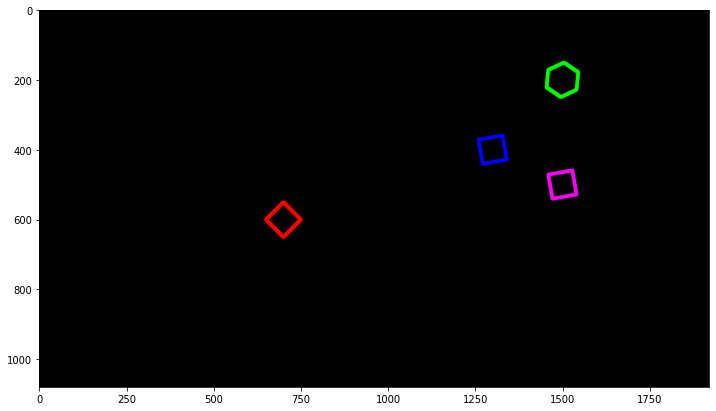

In [266]:
contours, hierarchy = cv.findContours(conveyor_f100, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
con_copy = cv.cvtColor(conveyor_f100.copy(), cv.COLOR_GRAY2BGR)
con_copy_ = np.zeros(con_copy.shape, dtype=int)
for i in range(len(contours)):
    cv.drawContours(con_copy_, contours, i,(np.random.randint(2)*255,np.random.randint(2)*255,np.random.randint(2)*255), 10)
fig, ax = plt.subplots(figsize=(12,10))
ax.imshow(con_copy_)
plt.show()
    


In [280]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [-1,  2, -1, -1]]], dtype=int32)

## Detecting Objects on a Synthetic Conveyor

In this section, we will use the synthetic `conveyor.mp4` sequence to
count the two types of nuts.

1.  Open the sequence and play it using the code below.

In [279]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture(r'Assignment-03 Materials\conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


2.  Count the number of matching hexagonal nuts in `conveyor_f100.png`.
    You can use `matchCountours` function as shown in
    <https://docs.opencv.org/4.5.2/d5/d45/tutorial_py_contours_more_functions.html>
    to match contours in each frame with that in th template.


In [283]:
contours1,hierarchy1 = cv.findContours(hexnut_template, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours2,hierarchy2 = cv.findContours(conveyor_f100, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
count = 0
for i in range(len(contours2)):
    ret = cv.matchShapes(contours1[0],contours2[i],1,0.0)
    if ret < 0.002:
        count+=1

print("No of matching hexagonal nuts -",count)

No of matching hexagonal nuts - 1
